### ***Chess Ratings  for Round - robin tournament***

ELO and Glicko Rating Systems


In [2]:
import numpy as np
import random
from datetime import datetime
import itertools
import pandas as pd
import matplotlib.pyplot as plt
%pip install chess
import chess


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
def UpdateRatingELO(player1, player2, white_win):
    r1 = player1[-1]
    r2 = player2[-1]
    R1 = 10**(r1 / 400)
    R2 = 10**(r2 / 400)
    E1 = R1 / (R1 + R2)
    E2 = R2 / (R1 + R2)
    nr1 = round(r1 + 32 * (white_win - E1))
    nr2 = round(r2 + 32 * ((1 - white_win) - E2))
    player1.append(nr1)
    player2.append(nr2)
    return [player1, player2]

def gfunc(q, RD):
    return 1 / np.sqrt(1 + (3 * q**2 * RD**2) / np.pi**2)

def ex(gj, r, rj, RDj):
    return 1 / (1 + 10**(-gj * (r - rj) / 400))

def UpdateRatingGLICKO(ratings_RD, S2_outcomes):
    q = np.log(10) / 400
    res1 = []
    for j in range(len(ratings_RD)):
        res = []
        for i in range(len(S2_outcomes)):
            if S2_outcomes[i][0] == j or S2_outcomes[i][1] == j:
                if S2_outcomes[i][0] == j:
                    res.append(ratings_RD[S2_outcomes[i][1]][-1] + [S2_outcomes[i][2]])
                else:
                    res.append(ratings_RD[S2_outcomes[i][0]][-1] + [1 - S2_outcomes[i][2]])
        res1.append(res)

    len_res1 = len(res1[0])
    rRDp = []
    for i in range(len(ratings_RD)):
        d2 = (q**2 * sum(gfunc(q, res1[i][j][1])**2 * ex(gfunc(q, res1[i][j][1]), ratings_RD[i][-1][0], res1[i][j][0], res1[i][j][1]) * (1 - ex(gfunc(q, res1[i][j][1]), ratings_RD[i][-1][0], res1[i][j][0], res1[i][j][1])) for j in range(len_res1)))**-1
        s2 = q / (1 / ratings_RD[i][-1][1]**2 + 1 / d2) * sum(gfunc(q, res1[i][j][1]) * (res1[i][j][2] - ex(gfunc(q, res1[i][j][1]), ratings_RD[i][-1][0], res1[i][j][0], res1[i][j][1]))for j in range(len_res1))
        newrating=[ratings_RD[i][-1][0] + s2, np.sqrt(1 / (1 / ratings_RD[i][-1][1]**2 + 1 / d2))]
        rRDp.append(newrating)
        ratings_RD[i].append(newrating)

    return [rRDp,ratings_RD]

In [4]:
names = ["Oscar", "Maluma", "Pablo","Salinas","Florez","Lucas","David"]
EloRatings = [[1500] for i in range(len(names))]
GlickoRatingsRD = [[[1500, 350]] for i in range(len(names))]

In [5]:
current_date = datetime.today().date()
target_date = datetime(2023, 10, 26).date()

if current_date == target_date:
    S = list(itertools.combinations(names, 2))
    S1 = random.sample(S + [tuple(reversed(x)) for x in S], len(S) * 2)
    with open("names_sorteo.txt", "w") as f:
        f.write("\n".join(names))
        f.write("\n")
        f.write("\n".join([" ".join(pair) for pair in S1]))
    print(S1)

[('Lucas', 'Florez'), ('Pablo', 'Maluma'), ('Florez', 'Pablo'), ('Lucas', 'Maluma'), ('Oscar', 'Lucas'), ('Salinas', 'Maluma'), ('Oscar', 'David'), ('Salinas', 'Lucas'), ('David', 'Salinas'), ('David', 'Oscar'), ('Florez', 'Lucas'), ('Salinas', 'David'), ('Lucas', 'Salinas'), ('David', 'Maluma'), ('Maluma', 'Florez'), ('Pablo', 'Lucas'), ('Lucas', 'Oscar'), ('Oscar', 'Maluma'), ('Florez', 'Oscar'), ('Salinas', 'Florez'), ('Pablo', 'David'), ('Lucas', 'David'), ('Oscar', 'Salinas'), ('Maluma', 'Salinas'), ('Oscar', 'Pablo'), ('Maluma', 'Lucas'), ('Pablo', 'Florez'), ('David', 'Pablo'), ('David', 'Florez'), ('Florez', 'Salinas'), ('Florez', 'David'), ('Pablo', 'Oscar'), ('Maluma', 'Oscar'), ('Salinas', 'Pablo'), ('David', 'Lucas'), ('Oscar', 'Florez'), ('Lucas', 'Pablo'), ('Salinas', 'Oscar'), ('Maluma', 'Pablo'), ('Florez', 'Maluma'), ('Pablo', 'Salinas'), ('Maluma', 'David')]


In [6]:
    S1outcomes = []
    S2outcomes = []
    for i in range(len(S1)):
        player1_index = names.index(S1[i][0])
        player2_index = names.index(S1[i][1])
        outcome = random.randint(0, 2) / 2
        S1outcomes.append([names[player1_index],names[player2_index],player1_index, player2_index, outcome])
        S2outcomes.append([player1_index, player2_index, outcome])


    # Create a DataFrame from S1outcomes
    df = pd.DataFrame(S1outcomes, columns=['Player 1', 'Player 2', 'Player 1 Index', 'Player 2 Index', 'S2 Outcome'])

    print(df)

   Player 1 Player 2  Player 1 Index  Player 2 Index  S2 Outcome
0     Lucas   Florez               5               4         0.0
1     Pablo   Maluma               2               1         0.0
2    Florez    Pablo               4               2         0.0
3     Lucas   Maluma               5               1         1.0
4     Oscar    Lucas               0               5         0.0
5   Salinas   Maluma               3               1         0.5
6     Oscar    David               0               6         0.0
7   Salinas    Lucas               3               5         1.0
8     David  Salinas               6               3         1.0
9     David    Oscar               6               0         0.5
10   Florez    Lucas               4               5         0.0
11  Salinas    David               3               6         0.0
12    Lucas  Salinas               5               3         0.0
13    David   Maluma               6               1         0.5
14   Maluma   Florez     

In [7]:
for i in range(len(S1outcomes)):
    white_player = S1outcomes[i][0]
    black_player = S1outcomes[i][1]
    whiteNum = S1outcomes[i][2]
    blackNum = S1outcomes[i][3]
    RatingW = EloRatings[whiteNum]
    RatingB = EloRatings[blackNum]

    RatingW, RatingB = UpdateRatingELO(RatingW, RatingB, S1outcomes[i][4])

    EloRatings[whiteNum] = RatingW
    EloRatings[blackNum] = RatingB

In [8]:
data = [(names[i], i, EloRatings[i][-1]) for i in range(len(names))]
sorted_ELO_data = sorted(data, key=lambda x: x[2], reverse=True)

sorted_ELO_view = pd.DataFrame(sorted_ELO_data, columns=['Player', 'Player Index', 'ELO Rating'])
print(sorted_ELO_view)

    Player  Player Index  ELO Rating
0    David             6        1540
1    Oscar             0        1533
2   Maluma             1        1512
3    Lucas             5        1500
4   Florez             4        1497
5    Pablo             2        1465
6  Salinas             3        1453


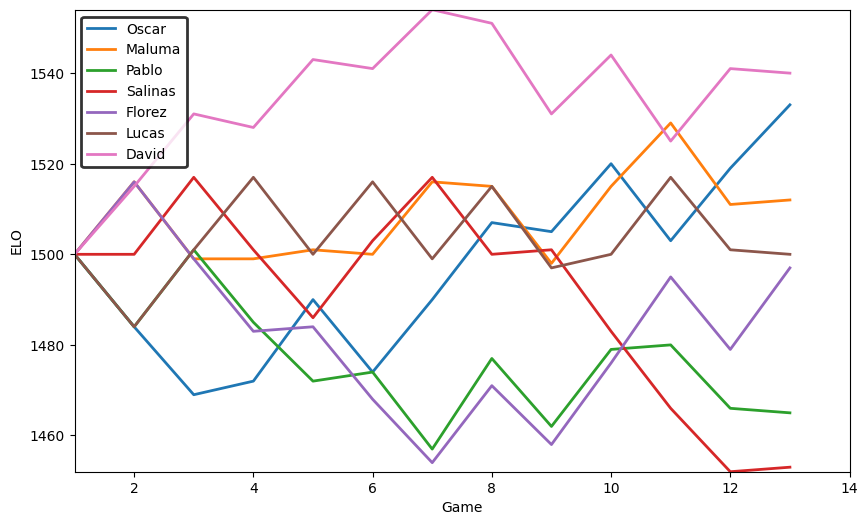

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(EloRatings)):
    ax.plot([i for i in range(1,len(EloRatings[i])+1)],EloRatings[i], label=names[i], linewidth=2)
ax.set_xlabel("Game")
ax.set_ylabel("ELO")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_tick_params(color='black')
ax.yaxis.set_tick_params(color='black')
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
legend = ax.legend()
frame = legend.get_frame()
frame.set_linewidth(2)
frame.set_edgecolor('black')
ax.set_xlim(1, len(EloRatings[1])+1)
ax.set_ylim(max(min(np.array(EloRatings).flatten()), 0), max(np.array(EloRatings).flatten()))
fig.set_size_inches(10, 6)
plt.show()

## Glicko Rating System

In [10]:
rRD = GlickoRatingsRD

In [11]:
newrRD, rRD = UpdateRatingGLICKO(rRD,S2outcomes)
data = [(names[i], i, newrRD[i][0],newrRD[i][1]) for i in range(len(names))]
sorted_data = sorted(data, key=lambda x: x[2], reverse=True)
sorted_glecko_view = pd.DataFrame(sorted_data, columns=['Player', 'Player Index', 'GLECKO Rating', 'GLECKO SD'])

In [12]:
print(sorted_glecko_view)
print(sorted_ELO_view)

    Player  Player Index  GLECKO Rating   GLECKO SD
0    David             6    1646.263656  137.797007
1    Oscar             0    1573.131828  137.797007
2   Maluma             1    1536.565914  137.797007
3    Lucas             5    1500.000000  137.797007
4   Florez             4    1463.434086  137.797007
5    Pablo             2    1390.302258  137.797007
6  Salinas             3    1390.302258  137.797007
    Player  Player Index  ELO Rating
0    David             6        1540
1    Oscar             0        1533
2   Maluma             1        1512
3    Lucas             5        1500
4   Florez             4        1497
5    Pablo             2        1465
6  Salinas             3        1453


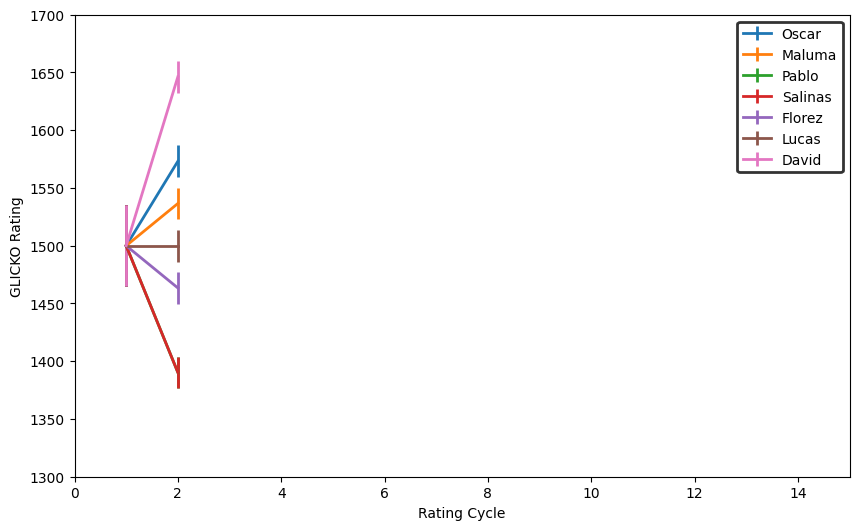

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(rRD)):
    ax.errorbar([j for j in range(1,len(rRD[i])+1)],np.array(rRD)[i,::,0],np.array(rRD)[i,::,1]/10, label=names[i], linewidth=2)
ax.set_xlabel("Rating Cycle")
ax.set_ylabel("GLICKO Rating")
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.set_tick_params(color='black')
ax.yaxis.set_tick_params(color='black')
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
legend = ax.legend()
frame = legend.get_frame()
frame.set_linewidth(2)
frame.set_edgecolor('black')
ax.set_xlim(0, 15)
ax.set_ylim(1300, 1700)
fig.set_size_inches(10, 6)
plt.show()

## Chess Analysis

In [1]:
import time
from IPython.display import display, HTML, clear_output

In [2]:
def play_game(player1, player2, visual="svg", pause=0.1):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    board = chess.Board()
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)

In [3]:

def who(player):
    return "White" if player == chess.WHITE else "Black"

In [4]:
def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"

In [5]:
def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()

In [6]:
random_player(board)

NameError: name 'board' is not defined

In [7]:
play_game(random_player, random_player)

NameError: name 'chess' is not defined